# Word Color and Size for Transparency

**Note:** The displayed document will not show on GitHub. Try viewing it either through running your Jupyter Notebook or through https://nbviewer.jupyter.org/.

In [1]:
import codecs
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pylab as plt
from IPython.core import display
import re

In [2]:
with open("data/imdb.pickle.z", 'rb') as f:
    compressed_data = f.read()

uncompressed_data = codecs.decode(compressed_data, 'zlib_codec')
imdb_data = pickle.loads(uncompressed_data)

In [3]:
imdb_data.keys()

dict_keys(['y_test', 'train_corpus', 'test_corpus', 'y_train', 'DESCR'])

In [4]:
tp = r"(?u)\b[\w\'/]+\b"
vect = CountVectorizer(token_pattern=tp, lowercase=True, ngram_range=(1, 1), min_df=100, max_df=0.7, binary=True)

In [5]:
X_train = vect.fit_transform(imdb_data['train_corpus'])

In [6]:
X_train.shape

(25000, 3885)

In [7]:
feature_names = np.asarray(vect.get_feature_names())

In [8]:
X_test = vect.transform(imdb_data['test_corpus'])

In [9]:
y_train = imdb_data['y_train']
y_test = imdb_data['y_test']

In [10]:
from sklearn.naive_bayes import BernoulliNB

In [11]:
clf = BernoulliNB()

In [12]:
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [13]:
clf.score(X_test, y_test)

0.84764

In [17]:
tw = clf.feature_log_prob_[1] - clf.feature_log_prob_[0]

In [18]:
inds = np.argsort(tw)

In [19]:
for i in inds[:10]:
    print(feature_names[i], tw[i])

2/10 -4.102643365036796
4/10 -3.5263605246161616
3/10 -3.508555899982655
unwatchable -2.9856819377004893
stinker -2.9856819377004893
incoherent -2.9061201148643034
1/10 -2.8200552594787043
mst3k -2.7269186854065923
unfunny -2.6164830075767194
waste -2.5323731870269244


In [20]:
for i in inds[::-1][:10]:
    print(feature_names[i], tw[i])

7/10 3.316780039849572
8/10 3.0633909220278053
9/10 2.6741486494265283
10/10 2.5320245727650708
flawless 2.4336133554004498
superbly 2.3116349285139632
perfection 2.181224235989778
captures 2.0204432009178808
wonderfully 2.0130995935431146
refreshing 1.8951950564762976


In [21]:
def doc2html(doc_raw, w, vocabulary, tokenizer, size_ranges):
    html_rep = ""
    tokens = doc_raw.split(" ") 
    seen_tokens = set()
    for token in tokens:
        vocab_tokens = tokenizer.findall(token.lower())
        if len(vocab_tokens) > 0:
            vocab_token = vocab_tokens[0]
            if vocab_token in vocabulary:
                vocab_index = vocabulary[vocab_token]
                
                ws = "(%0.2f)" %w[vocab_index]
                #print(ws)

                if vocab_index not in seen_tokens:

                    if w[vocab_index] > 0: # positive word
                        s = np.sum(w[vocab_index] > size_ranges)
                        html_rep = html_rep + "<font size = " + str(s) + ", color=blue> " + token + ws + " </font>"

                    elif w[vocab_index] < 0: # negative word
                        s = np.sum(np.abs(w[vocab_index]) > size_ranges)
                        html_rep = html_rep + "<font size = " + str(s) + ", color=red> " + token + ws + " </font>"

                    else: # neutral word
                        html_rep = html_rep + "<font size = 1, color=black> " + token + " </font>"

                    seen_tokens.add(vocab_index)

                else: # if this is a token we have seen before
                    html_rep = html_rep + "<font size = 1, color=black> " + token + " </font>"
            else: # this token does not exist in the vocabulary
                html_rep = html_rep + "<font size = 1, color=gray> " + token + " </font>"
        else:
            html_rep = html_rep + "<font size = 1, color=gray> " + token + " </font>"
    return html_rep

In [22]:
tokenizer = re.compile(tp)

(array([2.452e+03, 9.710e+02, 3.020e+02, 9.000e+01, 4.100e+01, 1.500e+01,
        6.000e+00, 4.000e+00, 3.000e+00, 1.000e+00]),
 array([0.        , 0.41026434, 0.82052867, 1.23079301, 1.64105735,
        2.05132168, 2.46158602, 2.87185036, 3.28211469, 3.69237903,
        4.10264337]),
 <a list of 10 Patch objects>)

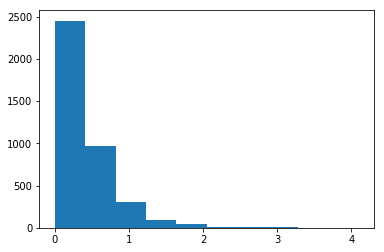

In [23]:
plt.hist(np.abs(tw))

In [24]:
#size_ranges = np.linspace(0, max([abs(tw.min()), abs(tw.max())]), 10)
size_ranges = np.linspace(0, 1.5, 8)

In [25]:
size_ranges

array([0.        , 0.21428571, 0.42857143, 0.64285714, 0.85714286,
       1.07142857, 1.28571429, 1.5       ])

In [26]:
train_corp = imdb_data['train_corpus']

In [29]:
i=1
display.HTML(doc2html(train_corp[i], tw, vect.vocabulary_, tokenizer, size_ranges))